# Battle of Neighbourhood | Finding out the best possible location for buying or renting home in UttarPradesh for Immigrants from other cities.

### Importing important python libraries

In [1]:
import pandas as pd
import numpy as np
import json

!pip install geopy
from geopy.geocoders import Nominatim

import requests
from pandas import json_normalize
!pip install geocoder
import geocoder

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

!pip install folium
import folium
print('Libraries imported.')

Libraries imported.


# Fetching the name of districts in UttarPradesh from 
# https://www.indianmirror.com/india-post/indianpincode.html

In [2]:
from bs4 import BeautifulSoup
url = 'https://www.indianmirror.com/india-post/indianpincode.html'
r = requests.get(url)
soup = BeautifulSoup(r.content, 'lxml' )

In [3]:
soup

<!DOCTYPE html>
<html lang="en-US">
<head>
<link href="https://www.indianmirror.com/includes/im-mobileport.css" media="screen" rel="stylesheet" type="text/css"/>
<!--[if lt IE 9]>
<link rel="stylesheet" type="text/css" media="all" href="https://www.indianmirror.com/includes/im-mobileport-ie.css"/>
<![endif]-->
<title>Indian Pincode, Area code, List of Districts in India, Indian Districts </title>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width" name="viewport"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="Indian Pincode, Area code, List of Districts in India, Indian Districts, Population, Area Code, Pincode, Ddensity, Area, Districts, Union territories, Cities, Head quarters, Latitude and Longtitude, states, wet bengal, assam, andhra pradesh, jammu and kashmir, tamilnadu, mizroam, nagaland, manipur, maharashtra, delhi, bihar, goa, orissa, chhattisgarh" name="keywords"/>
<meta conte

### Using soup object created above, extracting the list of cities in Uttar Pradesh

In [4]:
bs = soup.find_all('div', attrs = {'align': 'left'})[4717: 5340]
list_0 = [b.string for b in bs[::3]]
list_cities = []
for i in list_0[0::3]:
    list_cities.append(i)
list_cities

['Agra',
 'Allahabad',
 'Aligarh',
 'Ambedkar Nagar',
 'Auraiya',
 'Azamgarh',
 'Barabanki',
 'Badaun',
 'Bagpat',
 'Bahraich',
 'Bijnor',
 'Ballia',
 'Banda',
 'Balrampur',
 'Bareilly',
 'Basti',
 'Bulandshahr',
 'Chandauli',
 'Chitrakoot',
 'Deoria',
 'Etah',
 'Etawah',
 'Firozabad',
 'Farrukhabad',
 'Fatehpur',
 'Faizabad',
 'Gautam Buddha Nagar',
 'Gonda',
 'Ghazipur',
 'Gorkakhpur',
 'Ghaziabad',
 'Hamirpur',
 'Hardoi',
 'Mahamaya Nagar',
 'Jhansi',
 'Jalaun',
 'Jyotiba Phule Nagar',
 'Jaunpur District',
 'Kanpur Dehat, Ramabai nagar',
 'Kannauj',
 'Kanpur Nagar',
 'Kaushambi',
 'Kushinagar',
 'Lalitpur',
 'Lakhimpur Kheri',
 'Lucknow',
 'Mau',
 'Meerut',
 'Maharajganj',
 'Mahoba',
 'Mirzapur',
 'Moradabad',
 'Mainpuri',
 'Mathura',
 'Muzaffarnagar',
 'Pilibhit',
 'Pratapgarh',
 'Rampur',
 'Rae Bareli',
 'Saharanpur',
 'Sitapur',
 'Shahjahanpur',
 'Sant Kabir Nagar',
 'Siddharthnagar',
 'Sonbhadra',
 'Sant Ravidas Nagar',
 'Sultanpur',
 'Shravasti',
 'Unnao',
 'Varanasi']

### Using the soup object, extracting the latitude & longitude column from the scraped data

In [5]:
ts = soup.find_all('span', attrs = {'class': 'style25'})
ll_0 = [t.string for t in ts[521:614] if t.string != str(t)]
ll_0
lat_long = []
for i in ll_0:
    if i != None:
        lat_long.append(i)
lat_long

["27° 10' N  &\t78° 05' E",
 "25° 28' N  & \t81° 54' E",
 "27° 30' N  & \t79° 40' E",
 "26° 26' N &\t52° 33' E",
 "26° 28' N & 79° 31' E",
 "26° 03' N &\t83° 13' E",
 "26° 56' N &\t81° 13' E",
 "28° 03' N & 79\t° 07' E",
 "28° 57' N & 77\t° 13' E",
 "27° 34' N &\t81° 38' E",
 "29° 23' N &\t79° 11' E",
 "25° 44' N &\t84° 11' E",
 "25° 20' N &\t80° 22' E",
 "27° 25' N &\t82° 10' E",
 "28° 22' N &\t79° 27' E",
 "26° 48' N &\t82° 46' E",
 "28° 24' N &\t77° 54' E",
 "28° 27' N &\t78° 49' E",
 "25° 10' N &\t80° 53' E",
 "26° 23' N &\t83° 42' E",
 "27° 35' N &\t78° 40' E",
 "26° 47' N &\t79° 02' E",
 "27° 09' N &\t78° 24' E",
 "27° 24' N &\t79° 37' E",
 "25° 55' N &\t80° 52' E",
 "26° 47' N &\t82° 12' E",
 "28° 02' N & 70\t° 30' E",
 "27° 28' N &\t82° 01' E",
 "25° 34' N &\t83° 35' E",
 "26° 45' N &\t83° 24' E",
 "28° 40' N &\t77° 28' E",
 "25° 58' N &\t80° 12' E",
 "27° 23' N &\t80° 10' E",
 "27° 36' N & 78\t° 03' E",
 "25° 27' N &\t78° 37' E",
 "26° 08' N &\t79° 23' E",
 "28° 54' N &\t78° 3

### Creating a new dataframe 

In [6]:
UP_cities = pd.DataFrame({'Neighborhood': list_cities, 'Latitude & Longitude': lat_long})
UP_cities

,Neighborhood,Latitude & Longitude
0,Agra,27° 10' N &\t78° 05' E
1,Allahabad,25° 28' N & \t81° 54' E
2,Aligarh,27° 30' N & \t79° 40' E
3,Ambedkar Nagar,26° 26' N &\t52° 33' E
4,Auraiya,26° 28' N & 79° 31' E
...,...,...
65,Sant Ravidas Nagar,25° 21' N &\t82° 28' E
66,Sultanpur,26° 16' N &\t82° 04' E
67,Shravasti,27° 55' N &\t81° 97' E
68,Unnao,26° 48' N &\t80° 43' E


### Changing the datatype of 'Latitude & Longitude' column to string

In [7]:
UP_cities['Latitude & Longitude'] = [str(i) for i in UP_cities['Latitude & Longitude'][0:]]
UP_cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Neighborhood          70 non-null     object
 1   Latitude & Longitude  70 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


### Splitting the 'Latitude & Longitude' column into 2 columns namely 'Latitude' and 'Longitude'

In [8]:
UP_cities['Latitude'] = [i.split('&')[0] for i in UP_cities['Latitude & Longitude'][0:]]
UP_cities['Longitude'] = [i.split('&')[1] for i in UP_cities['Latitude & Longitude'][0:]]
UP_cities

,Neighborhood,Latitude & Longitude,Latitude,Longitude
0,Agra,27° 10' N &\t78° 05' E,27° 10' N,\t78° 05' E
1,Allahabad,25° 28' N & \t81° 54' E,25° 28' N,\t81° 54' E
2,Aligarh,27° 30' N & \t79° 40' E,27° 30' N,\t79° 40' E
3,Ambedkar Nagar,26° 26' N &\t52° 33' E,26° 26' N,\t52° 33' E
4,Auraiya,26° 28' N & 79° 31' E,26° 28' N,79° 31' E
...,...,...,...,...
65,Sant Ravidas Nagar,25° 21' N &\t82° 28' E,25° 21' N,\t82° 28' E
66,Sultanpur,26° 16' N &\t82° 04' E,26° 16' N,\t82° 04' E
67,Shravasti,27° 55' N &\t81° 97' E,27° 55' N,\t81° 97' E
68,Unnao,26° 48' N &\t80° 43' E,26° 48' N,\t80° 43' E


### Converting each row of 'Longitude' column's content into a list containing data into degree & minutes

In [9]:
#UP_cities['Longitude'].head(30)
Longitude = []
for i in UP_cities['Longitude']:
    Longitude.append((i.split(' ')))
Longitude
fl = []
for j in Longitude:
    for k in j:
        if k:
            fl.append(k)
fl1 = []
for l in fl:
    if l != 'E':
        fl1.append(l)
fl2 = []
for m in fl1:
    if m != "'":
        fl2.append(m)
fl3 = []
for m in fl2:
    if '\t' in m:
        fl3.append((m.replace('\t', '')))
    else:
        fl3.append(m)
fl4 =[]
for j in fl3:
    if (fl3.index(j))%2 == 0:
        fl4.append(j)
fl4
fl5 = []
for k in fl3:
    if (fl3.index(k))%2 != 0:
        fl5.append(k)
fl5
fl6 = []
for m,n in zip(fl4, fl5):
    fl6.append([m, n])
UP_cities['Longitude'] = fl6
UP_cities['Longitude']

0     [78°, 05']
1     [81°, 54']
2     [79°, 40']
3     [52°, 33']
4     [79°, 31']
         ...    
65    [82°, 28']
66    [82°, 04']
67    [81°, 97']
68    [80°, 43']
69    [83°, 00']
Name: Longitude, Length: 70, dtype: object

### Converting the 'Latitude' and 'Longitude' data into geological coordinates for further processing

In [10]:
UP_cities['Latitude'] = [(int(i.split(' ')[0][0:2])) + int((i.split(' ')[1][0:2]))/60 for i in UP_cities['Latitude'][0:]]
UP_cities["Longitude"] = [(int(i[0][0:2])) + int((i[1][0:2]))/60 for i in UP_cities['Longitude'][0:]]
UP_cities

,Neighborhood,Latitude & Longitude,Latitude,Longitude
0,Agra,27° 10' N &\t78° 05' E,27.166667,78.083333
1,Allahabad,25° 28' N & \t81° 54' E,25.466667,81.900000
2,Aligarh,27° 30' N & \t79° 40' E,27.500000,79.666667
3,Ambedkar Nagar,26° 26' N &\t52° 33' E,26.433333,52.550000
4,Auraiya,26° 28' N & 79° 31' E,26.466667,79.516667
...,...,...,...,...
65,Sant Ravidas Nagar,25° 21' N &\t82° 28' E,25.350000,82.466667
66,Sultanpur,26° 16' N &\t82° 04' E,26.266667,82.066667
67,Shravasti,27° 55' N &\t81° 97' E,27.916667,82.616667
68,Unnao,26° 48' N &\t80° 43' E,26.800000,80.716667


### Below is the final dataframe to use in foursquare api

In [11]:
ut_cities = UP_cities.drop('Latitude & Longitude', axis = 1)
ut_cities

,Neighborhood,Latitude,Longitude
0,Agra,27.166667,78.083333
1,Allahabad,25.466667,81.900000
2,Aligarh,27.500000,79.666667
3,Ambedkar Nagar,26.433333,52.550000
4,Auraiya,26.466667,79.516667
...,...,...,...
65,Sant Ravidas Nagar,25.350000,82.466667
66,Sultanpur,26.266667,82.066667
67,Shravasti,27.916667,82.616667
68,Unnao,26.800000,80.716667


# Use Geopy Library to get the latitude & longitude values of UttarPradesh

In [12]:
address = 'Uttar Pradesh'

geolocator = Nominatim(user_agent="ut_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Uttar Pradesh are {}, {}.'.format(latitude, longitude)) 

The geograpical coordinate of Uttar Pradesh are 27.1303344, 80.859666.


 # Create a map of UttarPradesh with nearby cities superimposed on top

In [13]:
# create map of Uttarakhand using latitude and longitude values
map_ut = folium.Map(location=[latitude, longitude], zoom_start=7)

# add markers to map
for lat, lng, ct in zip(ut_cities['Latitude'], ut_cities['Longitude'], ut_cities['Neighborhood']):
    label = '{}'.format(ct)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_ut)  
    
map_ut

# Use Foursquare API to explore the nearby cities

In [ ]:
CLIENT_ID = 'your client id' # your Foursquare ID
CLIENT_SECRET = 'your client secret' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

### Defining a function for getting nearby venues within a radius of 40 kilometers from each city center

In [17]:
def getNearbyVenues(names, latitudes, longitudes, radius=40000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues) 

### Calling the function for getting neighbourhood city names 

In [18]:
ut_cities_venues = getNearbyVenues(names=ut_cities['Neighborhood'], latitudes=ut_cities['Latitude'],longitudes=ut_cities['Longitude'])

Agra
Allahabad
Aligarh
Ambedkar Nagar
Auraiya
Azamgarh
Barabanki
Badaun
Bagpat
Bahraich
Bijnor
Ballia
Banda
Balrampur
Bareilly
Basti
Bulandshahr
Chandauli
Chitrakoot
Deoria
Etah
Etawah
Firozabad
Farrukhabad
Fatehpur
Faizabad
Gautam Buddha Nagar
Gonda
Ghazipur
Gorkakhpur
Ghaziabad
Hamirpur
Hardoi
Mahamaya Nagar
Jhansi
Jalaun
Jyotiba Phule Nagar
Jaunpur District
Kanpur Dehat, Ramabai nagar
Kannauj
Kanpur Nagar
Kaushambi
Kushinagar
Lalitpur
Lakhimpur Kheri
Lucknow
Mau
Meerut
Maharajganj
Mahoba
Mirzapur
Moradabad
Mainpuri
Mathura
Muzaffarnagar
Pilibhit
Pratapgarh
Rampur
Rae Bareli
Saharanpur
Sitapur
Shahjahanpur
Sant Kabir Nagar
Siddharthnagar
Sonbhadra
Sant Ravidas Nagar
Sultanpur
Shravasti
Unnao
Varanasi


# Getting the venue data in dataframe

In [19]:
ut_cities_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Agra,27.166667,78.083333,Taj Mahal | ताज महल | تاج محل (Taj Mahal),27.171047,78.042187,Historic Site
1,Agra,27.166667,78.083333,The Oberoi Amarvilas,27.168157,78.048721,Hotel
2,Agra,27.166667,78.083333,DoubleTree by Hilton,27.151675,78.050936,Hotel
3,Agra,27.166667,78.083333,Trident,27.159469,78.060044,Hotel
4,Agra,27.166667,78.083333,Agra Fort | आगरा का किला | آگرہ قلعہ (Agra Fort),27.176607,78.022290,Historic Site


### For getting number of venue category in each neighbourhood city, I used groupby() function

In [20]:
ut_cities_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agra,45,45,45,45,45,45
Aligarh,6,6,6,6,6,6
Allahabad,18,18,18,18,18,18
Ambedkar Nagar,3,3,3,3,3,3
Auraiya,8,8,8,8,8,8
...,...,...,...,...,...,...
Sitapur,4,4,4,4,4,4
Sonbhadra,3,3,3,3,3,3
Sultanpur,10,10,10,10,10,10


### There are 123 unique venue categories in UttarPradesh

In [22]:
print('There are {} uniques categories.'.format(len(ut_cities_venues['Venue Category'].unique())))

There are 123 uniques categories.


# Analyzing each neighborhood by converting each venue category into dummy values

In [23]:
# one hot encoding
ut_onehot = pd.get_dummies(ut_cities_venues['Venue Category'], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
ut_onehot['Neighborhood'] = ut_cities_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [ut_onehot.columns[-1]] + list(ut_onehot.columns[:-1])
ut_onehot = ut_onehot[fixed_columns]

ut_onehot.head()

,Vegetarian / Vegan Restaurant,ATM,Accessories Store,Airport,Airport Service,Airport Terminal,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,South Indian Restaurant,Spa,Speakeasy,Tea Room,Temple,Thai Restaurant,Town,Trail,Train Station,Tunnel
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category, to use the data in K-Means clustering

In [24]:
ut_grouped = ut_onehot.groupby('Neighborhood').mean().reset_index()
ut_grouped

,Neighborhood,Vegetarian / Vegan Restaurant,ATM,Accessories Store,Airport,Airport Service,Airport Terminal,American Restaurant,Art Gallery,Art Museum,...,South Indian Restaurant,Spa,Speakeasy,Tea Room,Temple,Thai Restaurant,Town,Trail,Train Station,Tunnel
0,Agra,0.0,0.000000,0.0,0.022222,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00,0.000000,0.0,0.000000,0.0,0.000000,0.0
1,Aligarh,0.0,0.666667,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00,0.000000,0.0,0.000000,0.0,0.000000,0.0
2,Allahabad,0.0,0.000000,0.0,0.055556,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00,0.000000,0.0,0.000000,0.0,0.055556,0.0
3,Ambedkar Nagar,0.0,0.000000,0.0,0.333333,0.0,0.0,0.333333,0.0,0.0,...,0.0,0.0,0.0,0.00,0.000000,0.0,0.000000,0.0,0.000000,0.0
4,Auraiya,0.0,0.375000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00,0.000000,0.0,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Sitapur,0.0,0.500000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00,0.000000,0.0,0.000000,0.0,0.000000,0.0
66,Sonbhadra,0.0,0.666667,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00,0.000000,0.0,0.000000,0.0,0.000000,0.0
67,Sultanpur,0.0,0.300000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00,0.000000,0.0,0.000000,0.0,0.300000,0.0
68,Unnao,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.02,0.000000,0.0,0.000000,0.0,0.000000,0.0


# Display top 10 venues for each neighborhood

In [25]:
import numpy as np 

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = ut_grouped['Neighborhood']

for ind in np.arange(ut_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(ut_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agra,Hotel,Indian Restaurant,Historic Site,Multicuisine Indian Restaurant,Fast Food Restaurant,Resort,Bed & Breakfast,Pizza Place,Italian Restaurant,Market
1,Aligarh,ATM,IT Services,Kids Store,Food,Convenience Store,Cricket Ground,Department Store,Dessert Shop,Dhaba,Diner
2,Allahabad,Pizza Place,Fast Food Restaurant,Hotel,Shopping Mall,Clothing Store,Multiplex,Café,Dessert Shop,Flea Market,Restaurant
3,Ambedkar Nagar,Café,Airport,American Restaurant,Donut Shop,Flower Shop,Flea Market,Fast Food Restaurant,Farm,Electronics Store,Tunnel
4,Auraiya,ATM,Bank,Indian Restaurant,Restaurant,Motorcycle Shop,Breakfast Spot,Electronics Store,Flea Market,Fast Food Restaurant,Farm


# Determining the optimum number of clusters in K-means using elbow method & Silhouette score

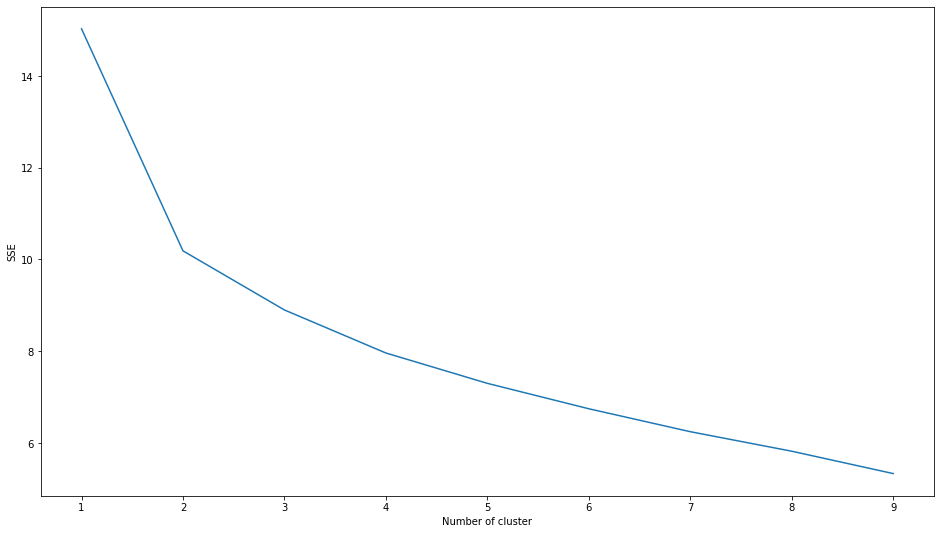

In [26]:
X = ut_grouped.iloc[: , 1:]

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
    X["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure(figsize = (16, 9))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()


Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.42916292288748314
For n_clusters = 3 The average silhouette_score is : 0.6251876926750025
For n_clusters = 4 The average silhouette_score is : 0.826294079517989
For n_clusters = 5 The average silhouette_score is : 0.6214774768554949
For n_clusters = 6 The average silhouette_score is : 0.4166696513773977


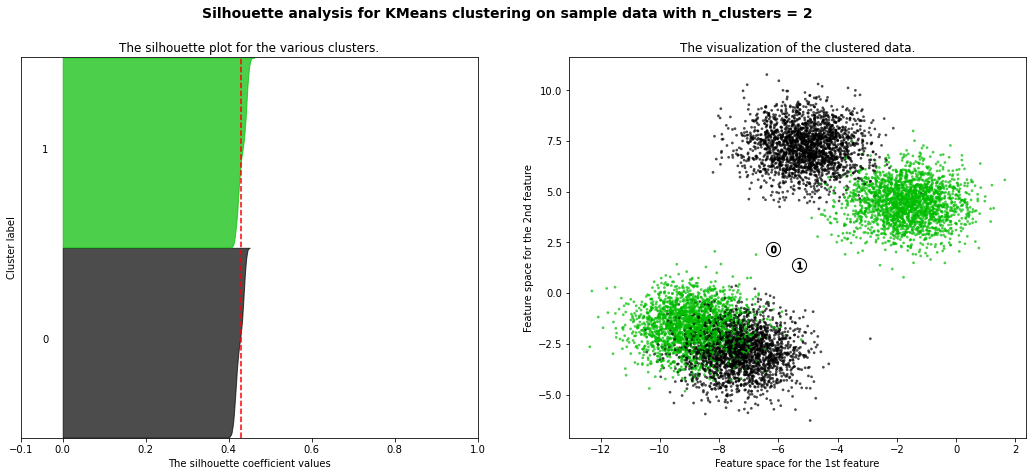

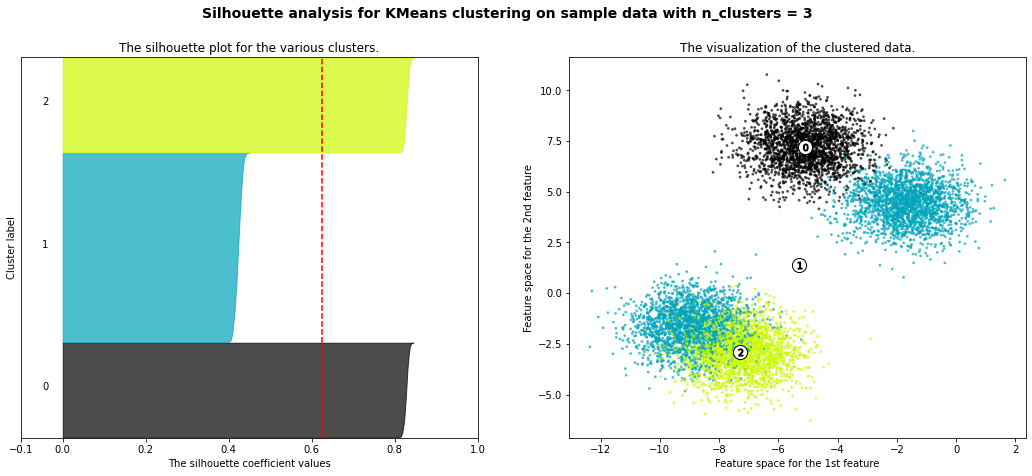

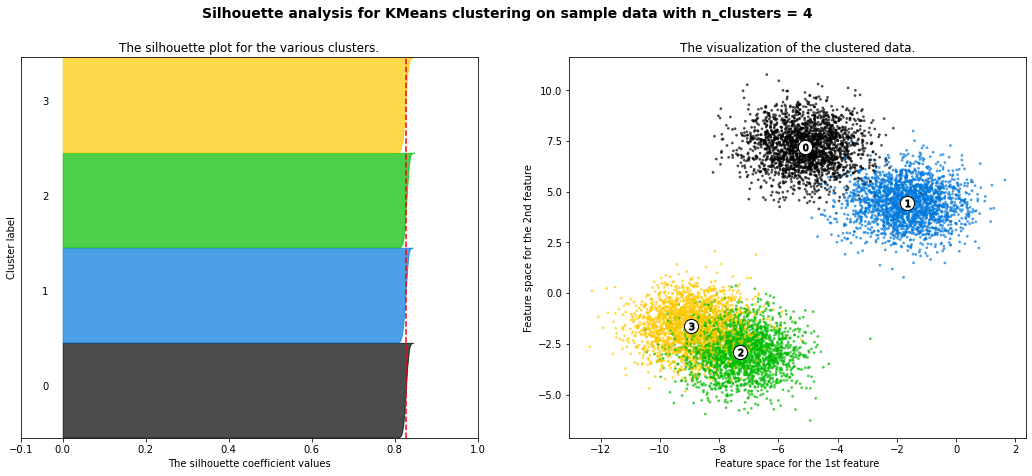

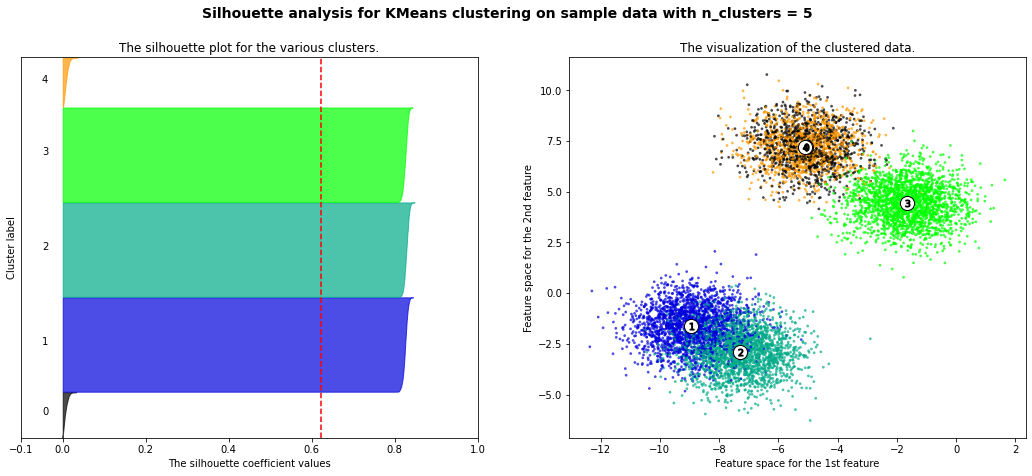

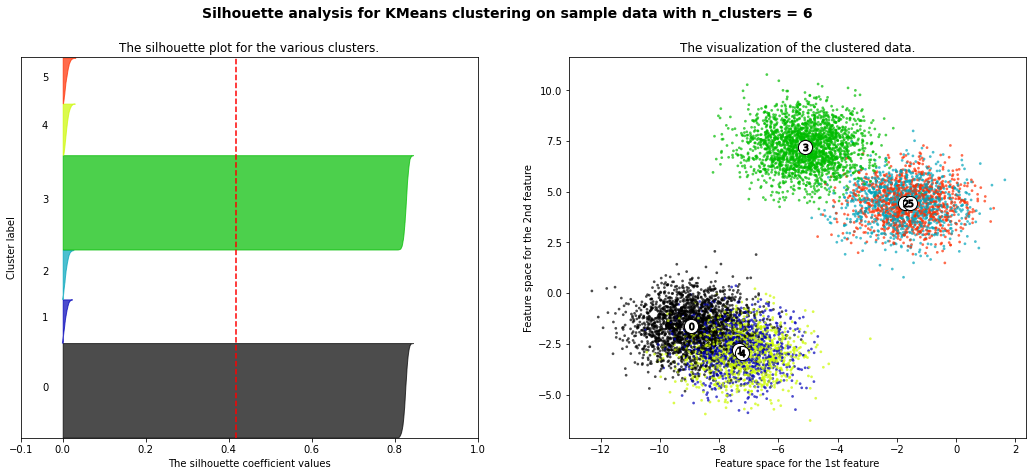

In [27]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=8610,
                  n_features=123,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

### As can be seen from the above plots, distributing cities into four clusters gives optimum results with Silhouette score value > 0.8 & also the thickness of each cluster label is more or less the same.

In [28]:
k1 = 4

ut_grouped_clustering = ut_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=k1, random_state=0).fit(ut_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 0, 1, 1, 0, 0, 3, 1, 3, 0])

In [29]:
ut_cities.head()

,Neighborhood,Latitude,Longitude
0,Agra,27.166667,78.083333
1,Allahabad,25.466667,81.900000
2,Aligarh,27.500000,79.666667
3,Ambedkar Nagar,26.433333,52.550000
4,Auraiya,26.466667,79.516667


# Merging the clustered label data with our dataframe

In [30]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [31]:
ut_merged = ut_cities.copy()
ut_merged = ut_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
ut_merged.head()

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agra,27.166667,78.083333,1,Hotel,Indian Restaurant,Historic Site,Multicuisine Indian Restaurant,Fast Food Restaurant,Resort,Bed & Breakfast,Pizza Place,Italian Restaurant,Market
1,Allahabad,25.466667,81.900000,1,Pizza Place,Fast Food Restaurant,Hotel,Shopping Mall,Clothing Store,Multiplex,Café,Dessert Shop,Flea Market,Restaurant
2,Aligarh,27.500000,79.666667,0,ATM,IT Services,Kids Store,Food,Convenience Store,Cricket Ground,Department Store,Dessert Shop,Dhaba,Diner
3,Ambedkar Nagar,26.433333,52.550000,1,Café,Airport,American Restaurant,Donut Shop,Flower Shop,Flea Market,Fast Food Restaurant,Farm,Electronics Store,Tunnel
4,Auraiya,26.466667,79.516667,0,ATM,Bank,Indian Restaurant,Restaurant,Motorcycle Shop,Breakfast Spot,Electronics Store,Flea Market,Fast Food Restaurant,Farm


# Finally, creating our UttarPradesh map with clustered data

In [47]:
import numpy as np
from matplotlib.colors import rgb2hex
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=7)

# set color scheme for the clusters
x = np.arange(k1)
ys = [i + x + (i*x)**2 for i in range(k1)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [rgb2hex(i) for i in colors_array]


# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(ut_merged['Latitude'], ut_merged['Longitude'], ut_merged['Neighborhood'], 
                                  ut_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker([lat, lon], 
                        radius=5, 
                        popup=label, 
                        color=rainbow[cluster-1],
                        fill=True,
                        fill_color=rainbow[cluster-1],
                        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters 
#rainbow

# Examine Clusters

# Cluster 1

In [48]:
ut_merged.loc[ut_merged['Cluster Labels'] == 0, ut_merged.columns[[0] + list(range(3, ut_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Aligarh,0,ATM,IT Services,Kids Store,Food,Convenience Store,Cricket Ground,Department Store,Dessert Shop,Dhaba,Diner
4,Auraiya,0,ATM,Bank,Indian Restaurant,Restaurant,Motorcycle Shop,Breakfast Spot,Electronics Store,Flea Market,Fast Food Restaurant,Farm
5,Azamgarh,0,ATM,Electronics Store,Tunnel,Food & Drink Shop,Convenience Store,Cricket Ground,Department Store,Dessert Shop,Dhaba,Diner
11,Ballia,0,ATM,Motorcycle Shop,Tunnel,Food,Convenience Store,Cricket Ground,Department Store,Dessert Shop,Dhaba,Diner
17,Chandauli,0,ATM,Train Station,Photography Studio,Food,Convenience Store,Cricket Ground,Department Store,Dessert Shop,Dhaba,Diner
19,Deoria,0,ATM,Platform,Tunnel,Food,Convenience Store,Cricket Ground,Department Store,Dessert Shop,Dhaba,Diner
23,Farrukhabad,0,ATM,IT Services,Indian Restaurant,Motorcycle Shop,Kids Store,Electronics Store,Flea Market,Fast Food Restaurant,Farm,Diner
29,Gorkakhpur,0,ATM,Train Station,Pizza Place,Multiplex,Shopping Mall,Tunnel,Diner,Fast Food Restaurant,Farm,Electronics Store
31,Hamirpur,0,ATM,Motorcycle Shop,Tunnel,Food,Convenience Store,Cricket Ground,Department Store,Dessert Shop,Dhaba,Diner
39,Kannauj,0,ATM,Indian Restaurant,Motorcycle Shop,Flower Shop,Tunnel,Food,Cricket Ground,Department Store,Dessert Shop,Dhaba


# Cluster 2

In [49]:
ut_merged.loc[ut_merged['Cluster Labels'] == 1, ut_merged.columns[[0] + list(range(3, ut_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agra,1,Hotel,Indian Restaurant,Historic Site,Multicuisine Indian Restaurant,Fast Food Restaurant,Resort,Bed & Breakfast,Pizza Place,Italian Restaurant,Market
1,Allahabad,1,Pizza Place,Fast Food Restaurant,Hotel,Shopping Mall,Clothing Store,Multiplex,Café,Dessert Shop,Flea Market,Restaurant
3,Ambedkar Nagar,1,Café,Airport,American Restaurant,Donut Shop,Flower Shop,Flea Market,Fast Food Restaurant,Farm,Electronics Store,Tunnel
6,Barabanki,1,Indian Restaurant,Café,Hotel,Fast Food Restaurant,Pizza Place,Bakery,Shopping Mall,Market,Multiplex,Ice Cream Shop
8,Bagpat,1,Indian Restaurant,Hotel,Café,Coffee Shop,Monument / Landmark,Park,BBQ Joint,Bakery,Dessert Shop,Dhaba
10,Bijnor,1,Lake,Resort,Bakery,Food,National Park,City,Café,Pizza Place,Mountain,Road
13,Balrampur,1,Hotel,Fast Food Restaurant,Train Station,Historic Site,Flower Shop,Comfort Food Restaurant,Convenience Store,Cricket Ground,Department Store,Dessert Shop
14,Bareilly,1,Shopping Mall,Convenience Store,Accessories Store,Tunnel,Food,Cricket Ground,Department Store,Dessert Shop,Dhaba,Diner
16,Bulandshahr,1,Fast Food Restaurant,Food Court,Hotel,Racetrack,Shopping Mall,Park,Café,Pizza Place,Business Center,Monument / Landmark
21,Etawah,1,Indian Restaurant,Coffee Shop,Astrologer,Bank,Train Station,Airport Service,Cricket Ground,Dessert Shop,Dhaba,Diner


# Cluster 3

In [50]:
ut_merged.loc[ut_merged['Cluster Labels'] == 2, ut_merged.columns[[0] + list(range(3, ut_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Banda,2,Train Station,Fast Food Restaurant,Food,Comfort Food Restaurant,Convenience Store,Cricket Ground,Department Store,Dessert Shop,Dhaba,Diner
15,Basti,2,Train Station,ATM,Business Service,Motorcycle Shop,Art Gallery,Dhaba,Diner,Donut Shop,Food & Drink Shop,Dessert Shop
18,Chitrakoot,2,Train Station,ATM,Platform,Food,Convenience Store,Cricket Ground,Department Store,Dessert Shop,Dhaba,Diner
25,Faizabad,2,Train Station,ATM,Motorcycle Shop,Tea Room,Donut Shop,Flea Market,Fast Food Restaurant,Farm,Electronics Store,Dhaba
28,Ghazipur,2,Train Station,ATM,Platform,Food,Convenience Store,Cricket Ground,Department Store,Dessert Shop,Dhaba,Diner
35,Jalaun,2,Train Station,ATM,Restaurant,Light Rail Station,Breakfast Spot,Electronics Store,Flea Market,Fast Food Restaurant,Farm,Donut Shop
43,Lalitpur,2,Train Station,ATM,Dessert Shop,Motorcycle Shop,Food & Drink Shop,Cricket Ground,Department Store,Dhaba,Diner,Donut Shop
49,Mahoba,2,Train Station,ATM,Food & Drink Shop,Convenience Store,Cricket Ground,Department Store,Dessert Shop,Dhaba,Diner,Donut Shop
65,Sant Ravidas Nagar,2,ATM,Train Station,Carpet Store,Men's Store,Motorcycle Shop,Ice Cream Shop,Airport Terminal,American Restaurant,Dessert Shop,Dhaba
66,Sultanpur,2,Train Station,ATM,Hotel,Badminton Court,Dessert Shop,Motorcycle Shop,Electronics Store,Flea Market,Fast Food Restaurant,Farm


# Cluster 4

In [51]:
ut_merged.loc[ut_merged['Cluster Labels'] == 3, ut_merged.columns[[0] + list(range(3, ut_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Badaun,3,Motorcycle Shop,ATM,Home Service,Tunnel,Flower Shop,Convenience Store,Cricket Ground,Department Store,Dessert Shop,Dhaba
9,Bahraich,3,ATM,Fast Food Restaurant,Motorcycle Shop,Tunnel,Food,Convenience Store,Cricket Ground,Department Store,Dessert Shop,Dhaba
20,Etah,3,ATM,Motorcycle Shop,Home Service,Platform,Tunnel,Diner,Fast Food Restaurant,Farm,Electronics Store,Donut Shop
61,Shahjahanpur,3,ATM,Motorcycle Shop,Train Station,Pizza Place,Flower Shop,Convenience Store,Cricket Ground,Department Store,Dessert Shop,Dhaba


# Observations

# Cluster 1 & Cluster 2 are amenities rich as they fulfill almost all the day-to-day life needs for people of business class. Cluster 4 consists of only four cities & is good for students & service class persons. Cluster 3 is ideal for families who want to live in some locality or gated society.